# A Computational Approach to S<sub>N</sub>2 Reactions

## Abstract
When first learning about organic reaction mechanisms, they can be tricky to wrap your head around. Some students may thrive with doing worked examples as a learning method, whereas others may require a "multimodal" approach. In the literature, it has been found that it is necessary for students to learn some of these computational methodologies as well as being beneficial in other academic contexts long-term.<sup>1, 2</sup> Computational methods can be a complementary technique to organic chemistry when learning reaction mechanisms, as it can provide insight into the energies behind transition states, allowing for theoretical calculations to be used in conjunction with experimental studies.


## Introduction
In this module, you will be guided through the simulation of an S<sub>N</sub>2 reaction involving a series of bromoalkanes to visually demonstrate the reaction and elucidate the transition state's energy. This notebook should provide insight into why specific substrates prefer to react via an S<sub>N</sub>2 pathway over an S<sub>N</sub>1 pathway. You will understand how to use Avogadro to build molecular structures and generate input files of different types. You will then use ORCA to do a large portion of the simulation and calculation of these reactions and will additionally gain an understanding of the theory underpinning these calculations. Finally, you will be exposed to a small snippet of code demonstrating some Python file input and output.

### Density Functional Theory
You will be utilising density functional theory (DFT) for the simulations and calculations run in this lab. DFT is a practical approach to finding solutions to the well-known Schrödinger equation; in this context, it is the many-body Schrödinger equations we need to solve.<sup>3</sup> The basis for DFT comes from the Kohn-Sham theorems. In essence, they embody the non-interacting Schrödinger equation that typically governs non-interacting particles (electrons). This theory results in the electron density in the calculated system having the same electron density as the equivalent interacting system.<sup>4</sup> This is possible due to the Exchange-Correlation functional, which utilises a uniform electron gas (constant electron density) to derive said function to an exact value.<sup>3</sup> This provides an approximation for a "Kohn-Sham equation". These equations culminate in DFT, where the many-body Schrödinger equation is broken down into a series of one-electron equations that are solved to find the energy minima (the ideal, lowest energy electron density).<br>

### Basis Sets
A basis set is a group of functions (known as basis functions) that represents the electron wave function in DFT to turn the partial differential equations that are output into algebraic equations that are suitable for computer implementation.<sup>5</sup> Ultimately, basis sets tie together the theory and computation for computational chemistry. There are many basis sets, but the few you will be exposed to are the "Karlsruhe Basis Sets". The simplest, def2-SVP, provides the least detail but has the quickest calculation time. At the other end of the scale, def2-QZVPP has the most detail but requires significantly more computation time. For this lab, we will stick with <b>def2-SVP</b> for brevity. You will use this basis set to optimise the geometry of the reactants and products prior to performing the method below.

### Nudged Elastic Band
In this experiment, you will use a concept known as the <b>Nudged Elastic Band</b>. This concept is a method for determining the saddle points and the path of least energy for a reaction between a known set of reactants and products. The method generates a series of optimal "images" whilst simulating the reaction, each finding the point of minimum energy whilst maintaining distance between neighbouring atoms.<sup>6</sup> As such, you have to provide ORCA with your best guess at both the reactants and products in a ".xyz" file. This method uses DFT so that the electron density is at a minimum at any given image, which is equivalent to the ideal electron density for the system.

# First Steps
First, you must download Avogadro. A special version to download comes with a series of ORCA functionalities built into it. As such, downloading the link provided in a Google search is insufficient. The correct version can be downloaded from the link below.<br><br>

[AvogadroORCA_4.2.1](https://www.dropbox.com/s/2gonb18fzpr2233/AvogadroOrca4.2.1.current.exe?dl=0)<br><br>

Once downloaded, install the program by following the instructions presented to you. <br>

All work will be done on a virtual machine, which you should have access to via the link you used to open this notebook. 

Next, we need to ensure that ORCA is installed and set up on the virtual machine and your terminal. To check if ORCA has been installed, you must go to your Jupyter Notebook home page (where all the files are displayed). Up the top right, you can see a box called <b>New</b>. Click that, then Terminal. See below for a picture of these steps.

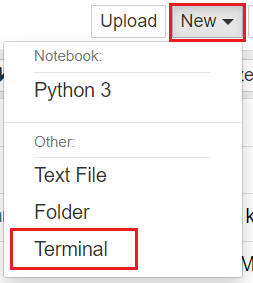<br>

ORCA is a command line program, meaning it lacks a GUI and prints information directly to the terminal and a file if a piping command is used.

A terminal window will then appear. Type the commands below. The <b>ls</b> is just to show the documents in the current directory.

```
ls
orca
```

If all has gone well and ORCA is installed, you will get an error message, as seen below. This message is one of the few error messages that spark joy!

```
This program requires the name of a parameter file as an argument. For example:
ORCA TEST.INP
```

<div class="alert alert-block alert-success">
<b>If you have gotten to this point with no issues, great!</b><br>You are now ready to continue. If you have had some issues, make sure to consult your demonstrator or tutor, who will be able to assist you further.
</div>


# Using Avogadro
Now that you have Avogadro downloaded and installed, let us start making some molecules!<br>
The first example is bromomethane reacting with chloride as a nucleophile.

Once Avogadro is opened, you will be presented with a black screen and a series of options on the left side, as seen below.<br>

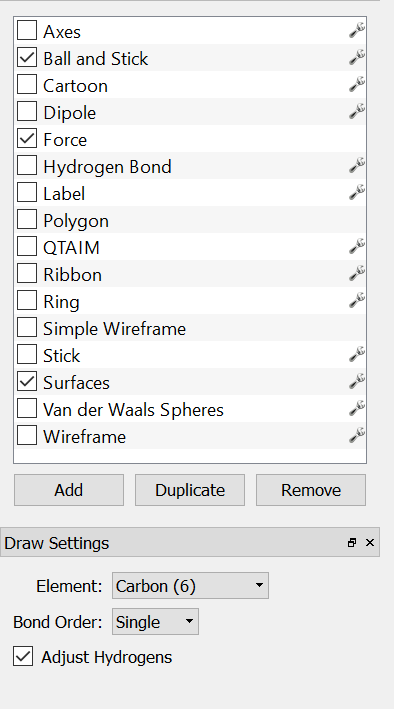

Click on the black area of the screen. This should give you a methane molecule. Click the drop down menu and change <b>Carbon (6)</b> to <b>Bromine (35)</b>.<br>
Now click one of the hydrogens to change to a bromine. You should end up with something like this.

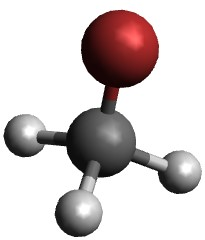

Now, we need to optimize the geometry within Avogadro. Just above the black screen, there is a symbol with a capital "E" and an arrow underneath it, as seen below. Click that, and change <b>UFF</b> to <b>MMFFs</b> and press <b>Start</b>. Once done, press <b>Stop</b>.

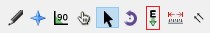

This should have increased the C-Br bond length.<br>
Now, we need to add a chloride ion. Click the <b>Pencil</b> in the same toolbar as before to bring back the draw menu. Turn off <b>Adjust Hydrogens</b> and change <b>Bromine (35)</b> to <b>Chlorine (17)</b> and place on the black screen, not bound to anything, on the opposite side to the bromine. Optimize the geometry again (by clicking the "E" with the arrow) using the same method to get something like what is pictured below.

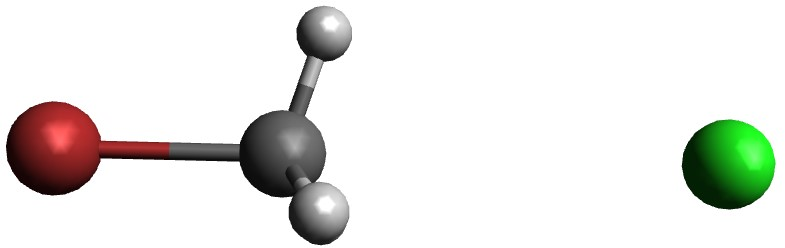

Save this file with a meaningful name, to state that it is the set of reactants. Try "Bromomethane_Reactants.xyz". If the file format is not <b>.xyz</b>, then go to <b>File</b>><b>Save As</b>><b>Save as type:</b> and change to <b>.xyz</b>.<br>

Next, we have to create the geometry optimization file for ORCA to run. We can do this in the Avogadro interface. Go to <b>Extensions</b>><b>Orca</b>><b>Generate Orca Input...</b> and then click <b>Advanced</b>, then <b>Control</b>. Use the settings pictured below.

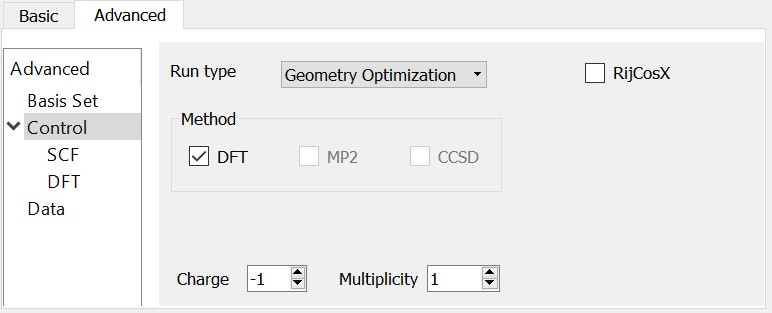

In the output preview, ensure there is only one space between <b>Grid4</b> and <b>NormalSCF</b>, as Avogadro can sometimes double space these and will cause an error when running with ORCA. Now you can save as either a <b>.inp</b> file, by clicking <b>Generate</b>, or save as a text file by copy+pasting. Either work, remember which you chose. Save the file with the same name as the previous file but with an additional <b>_Optim</b> at the end. So, something similar to "Bromomethane_Reactants_Optim.txt"<br>

The next step is to form the product set. This step can be a bit complicated, so follow the instructions carefully. You need to click the "mouse cursor" button in the top GUI, to bring up the menu. Next, click the <b>C-Br</b> bond, then <b>Backspace</b>. Select the <b>Chlorine</b> (green) atom, then <b>Backspace</b>. Click the pencil in the top GUI to return to the draw settings, make sure to turn off <b>Adjust Hydrogens</b>, change from <b>Carbon (6)</b> to <b>Chlorine (17)</b>, then click and drag from the central carbon <b>away</b> from the bromine. Optimize the set of structures as done previously. You will end up with something similar to what is pictured below. Make sure the stereochemistry shows inversion.

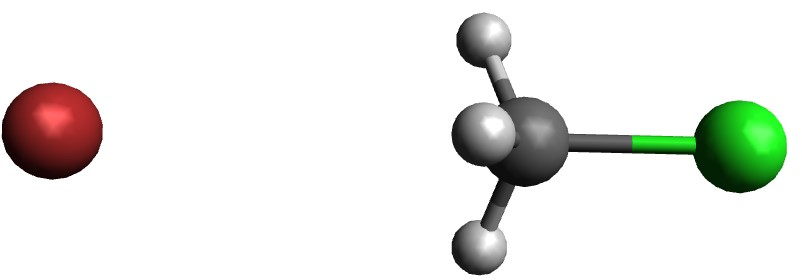

Save the file as an <b>.xyz</b> file again, and generate the Optimize Geometry file the same way as done before. You should be left with four files: two <b>.xyz</b> and two <b>.txt</b> files.<br>
Finally we need to set up our simulation settings file. Open a text editor, and use these settings below, replacing the reactant and product file names.

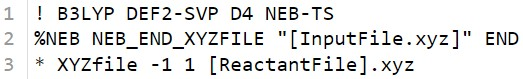

The meaning of each of the command words is not important, but a few important ones are <b>DEF2-SVP</b> being the basis set and the <b>NEB-TS</b> is the method of transition state search. The rest are present as they allow the simulation to function!

<div class="alert alert-block alert-success">
<b>Great, we now have set up all our files for simulating!</b><br>The files needed for the next steps can be seen in the image below. The names do not matter, but this guide will use these names for ease of explanation.
</div>

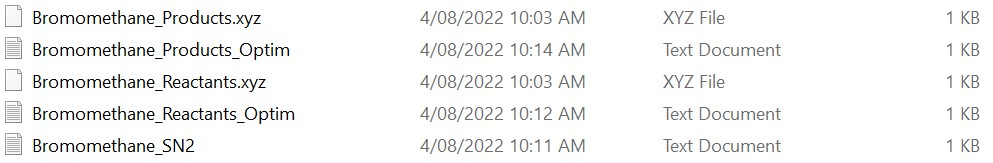

# Using ORCA
You will ideally want to create a folder <b>Simulating_SN2</b> on the provided virtual machine. This step can be done from the same interface you used to open a new terminal. Click <b>New</b>><b>Folder</b> then click the white box next to <b>Untitled Folder</b> and click <b>Rename</b> in the top left. The folder will be good to go. You will then want to, in that folder, make three folders called <b>Gas_Phase</b>, <b>Water</b> and <b>Acetonitrile</b>. Each of these folders you will want to make four folders with the names <b>Bromomethane</b>, <b>Bromoethane</b>, <b>Isopropyl_Bromide</b> and <b>TertButyl_Bromide</b>. It will get you something like this.

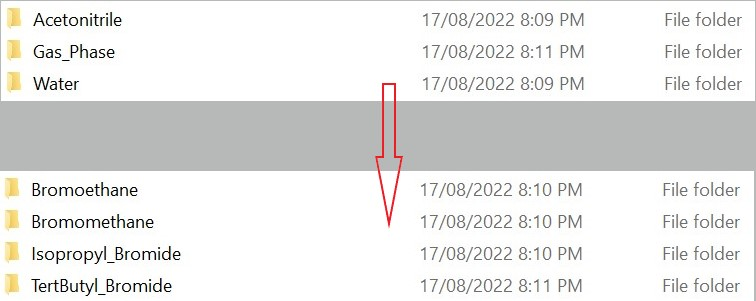

Navigate to <b>Gas_Phase</b> > <b>Bromomethane</b>, and upload the five files you have prepared. Once done, you will need to navigate to this file in a new terminal. Take this time to also familiarise yourself with the common terminal commands at this link:<br>

[Some Useful Commandline Commands](https://developer.mozilla.org/en-US/docs/Learn/Tools_and_testing/Understanding_client-side_tools/Command_line)

Once navigated to the folder where the files have been uploaded, we can start to use ORCA!<br>
We will now run the geometry optimisations for the products and reactants. To do this, type the command below into the terminal.
```
orca Bromomethane_Reactants_Optim.txt | tee Bromomethane_Reactants_Optim.out
```
The <b>| tee</b> command allows the ORCA program to print the results to the screen and a file. If you don't want the results to print to the screen, rather just a file, replace <b>| tee</b> with <b>></b>. Do the same step above for the products file.<br>

After the calculations are completed, a set of optimised geometry <b>.xyz</b> files will be output to the same folder. These should be the same name as the ORCA code file you prepared earlier.<br>

Now we will run the Nudged Elastic Band. Using the command line again, enter the following command and run it.
```
orca Bromomethane_SN2.txt | tee Bromomethane_SN2.out
```
These calculations can take a while to finish running, up to about 15 minutes. ORCA will run the calculations for you and output a series of folders. That is all that needs to be done for now.<br>

The above steps need to be repeated (from "Navigate to..." and below) for each of the other two solvents (Water and Acetonitrile). After navigating to the corresponding file, you will need to upload the pre-prepared files again.<br>

The only change that needs to be made is the <b>Bromomethane_SN2.txt</b> file. For water, you will need to add the following line of code below the first line.
```
! CPCM(Water)
```
This code tells ORCA the implicit solvent is water and should give you a file with these commands:

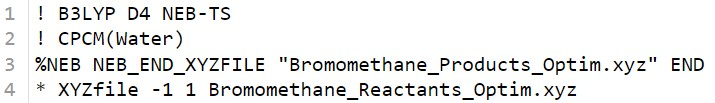

For Acetonitrile, the change will be the same, just replace <b>Water</b> with <b>Acetonitrile</b>. Run the file as you did for the Gas_Phase reaction.<br><br>

Once the simulations for Bromomethan in Gas Phase, Water and Acetonitrile have been completed, you are ready to move on. Luckily, the subsequent reactions are done for you, and you need to do the data manipulation. Below is a code snippet you can use to visualise the data for the SN2 reactions. All you need to change is the "rootDirSN2" variable to the file location on the virtual machine. Following the naming conventions in this guide, the existing path should be similar.

Text(60, 43.80375, 'Max Energy: 58.405 kJ/mol')

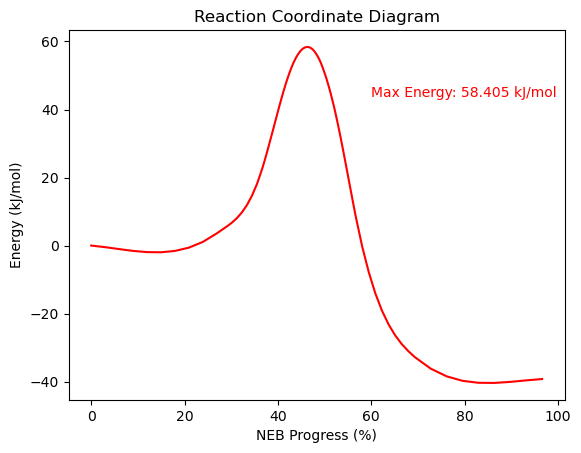

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rootDir = "Simulating_SN2/Acetonitrile/Isopropyl_Bromide/IsopropylBromide_SN2_Acetonitrile.final.interp" #<-- Change this to the respective SN2 path.

image = []
distance = [] 
energy = []

try:  
    with open (rootDir, "r") as file:
        for line in file.readlines()[16:97]:
            imageOut, distanceOut, energyOut = line.split()
            image.append(float(imageOut))
            energy.append(float(energyOut)) 
finally:
    file.close()

energyKilojoules = [ii * 2625.25 for ii in energy] 
imagePercent = [jj * 100 for jj in image]
ener = round(max(energyKilojoules), 3)
yPos = (ener * 3)/4
plt.title ("Reaction Coordinate Diagram")
plt.xlabel("NEB Progress (%)")
plt.ylabel("Energy (kJ/mol)")

plt.plot(imagePercent, energyKilojoules, label = ener, color = 'r')
plt.annotate(f"Max Energy: {ener} kJ/mol",[60,yPos], color='r')

Here are the links to the other notebooks if needed:

[Link to Introduction Notebook](https://chem2000.webredirect.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FNNCoffee%2FCRM-Computational-Project&urlpath=tree%2FCRM-Computational-Project%2FIntroduction+to+SN1+and+SN2+Reactions.ipynb&branch=master)<br>
[Link to SN1 Notebook](https://chem2000.webredirect.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2FNNCoffee%2FCRM-Computational-Project&urlpath=tree%2FCRM-Computational-Project%2FA+Computational+Approach+to+SN1+Reactions.ipynb&branch=main)

## References
1. Esselman BJ, Hill NJ. Integration of Computational Chemistry into the Undergraduate Organic Chemistry Laboratory Curriculum. Journal of chemical education. 2016;93(5):932-936. doi:10.1021/acs.jchemed.5b00815
2. van Staveren M. Integrating Python into a Physical Chemistry Lab. Journal of chemical education. 2022;99(7):2604-2609. doi:10.1021/acs.jchemed.2c00193
3. Sholl DS, Steckel JA. Density functional theory: a practical introduction. John Wiley & Sons; 2011 Sep 20.
4. Kohn W, Sham LJ. Self-consistent equations including exchange and correlation effects. Physical review. 1965 Nov 15;140(4A):A1133.
5. Basis set (chemistry). [Wiki]. Available from: https://en.wikipedia.org/wiki/Basis_set_(chemistry) [Accessed 7 August 2022].
6. Nudged Elastic Band — Transition State Tools for VASP [Internet]. theory.cm.utexas.edu. 2022 [cited 11 August 2022]. Available from: https://theory.cm.utexas.edu/vtsttools/neb.html